<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_day_0709/blob/main/2_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes
data = load_diabetes()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["y"] = data["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


1. 資料筆數: 看問題難度(越簡單就少) -> x多寡

a. 機器學習: 幾千-幾萬  
b. 深度學習: 幾萬-幾十萬筆

In [2]:
# drop
x = df.drop("y", axis=1)
y = df["y"]

In [3]:
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.25)
# 0.9x 0.1x 0.9y 0.1y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [4]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 's5 <= -0.004\nsquared_error = 6119.897\nsamples = 397\nvalue = 152.605'),
 Text(0.25, 0.5, 'bmi <= 0.006\nsquared_error = 3321.922\nsamples = 196\nvalue = 109.352'),
 Text(0.125, 0.16666666666666666, 'squared_error = 2086.749\nsamples = 156\nvalue = 95.699'),
 Text(0.375, 0.16666666666666666, 'squared_error = 4576.74\nsamples = 40\nvalue = 162.6'),
 Text(0.75, 0.5, 'bmi <= 0.069\nsquared_error = 5245.166\nsamples = 201\nvalue = 194.781'),
 Text(0.625, 0.16666666666666666, 'squared_error = 4617.636\nsamples = 171\nvalue = 181.573'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2159.796\nsamples = 30\nvalue = 270.067')]

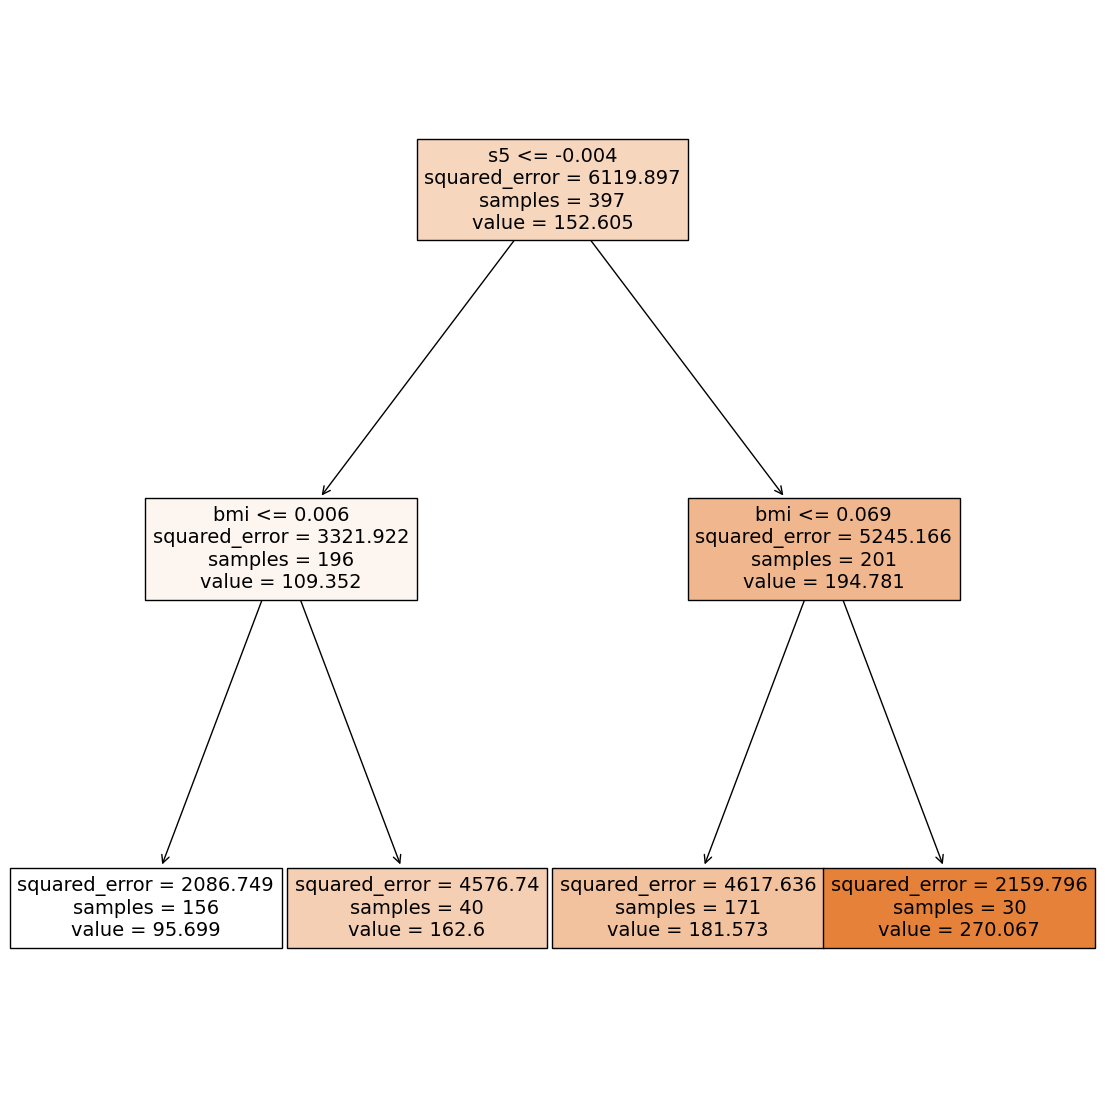

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[14, 14])
plot_tree(reg,
     feature_names=x.columns,
     filled=True)

In [7]:
reg.predict(x_test)

array([162.6       , 162.6       , 181.57309942,  95.69871795,
       181.57309942, 181.57309942, 181.57309942,  95.69871795,
       181.57309942,  95.69871795, 181.57309942, 162.6       ,
        95.69871795, 270.06666667, 181.57309942, 162.6       ,
       181.57309942, 181.57309942,  95.69871795, 181.57309942,
        95.69871795, 181.57309942,  95.69871795, 181.57309942,
       181.57309942,  95.69871795, 162.6       , 181.57309942,
       181.57309942,  95.69871795, 162.6       ,  95.69871795,
       181.57309942,  95.69871795, 181.57309942, 162.6       ,
       181.57309942, 181.57309942,  95.69871795,  95.69871795,
       181.57309942, 181.57309942,  95.69871795, 181.57309942,
        95.69871795])